In [1]:
import sys
sys.path.append('../../scripts/')
import manage_files as mf
import matplotlib.pyplot as plt
import numpy as np


/home/ricky/anaconda3/envs/all3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ricky/anaconda3/envs/all3/lib/python3.8/site-packages/MDAnalysis/coordinates/chemfiles.py:59: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")


In [2]:
output_path_relax="timescales/GWALP/"            # folder to save spin relaxation times yaml files, 
output_path_timescales="timescales/GWALP/"  # folder to save timescale yaml files
 
relaxation,calculated_systems=mf.load_yaml_files(output_path_relax,output_path_timescales)

Spin relaxation data exist for:

   * GWALP_mon_40_rep1_nothing_removed
   * GWALP_mon_80_rep2
   * GWALP_mon_45_rep1
   * GWALP_mon_70_rep1
   * GWALP_mon_70_rep1_nothing_removed
   * GWALP_mon_45_rep1_nothing_removed
   * GWALP_mon_40_rep1
   * GWALP_mon_50_rep1_nothing_removed
   * GWALP_mon_80_rep2_nothing_removed

 
Timescales exist for:

   * GWALP_mon_70_rep1_nothing_removed
   * GWALP_mon_45_rep1
   * GWALP_mon_70_rep1
   * GWALP_mon_80_rep2
   * GWALP_mon_80_rep2_nothing_removed
   * GWALP_mon_40_rep1_nothing_removed
   * GWALP_mon_45_rep1_nothing_removed
   * GWALP_mon_40_rep1
   * GWALP_mon_50_rep1_nothing_removed


In [3]:
calculated_systems=dict(sorted(calculated_systems.items()))
for system in calculated_systems:
    print(system)
    

GWALP_mon_40_rep1
GWALP_mon_40_rep1_nothing_removed
GWALP_mon_45_rep1
GWALP_mon_45_rep1_nothing_removed
GWALP_mon_50_rep1_nothing_removed
GWALP_mon_70_rep1
GWALP_mon_70_rep1_nothing_removed
GWALP_mon_80_rep2
GWALP_mon_80_rep2_nothing_removed


In [4]:
effTimes={} 
for system, timescales in calculated_systems.items():
    if '50' not in system and 'not' in system:
        tempEffTimes=[]   
        for file,data in timescales['analysis0']['results']['Coeff'].items():
            if data[-1]>0:
                data[-1]=0
            tempEffTimes.append(sum(i*j for i,j in zip(data,timescales['analysis0']['results']['Ctime']))*10**9)
        effTimes[system[:-1]]=tempEffTimes
        
effTimes2={} 
for system, timescales in calculated_systems.items():
    if '50' not in system and 'not' not in system:
        tempEffTimes=[]   
        for file,data in timescales['analysis0']['results']['Coeff'].items():
            if data[-1]>0:
                data[-1]=0
            tempEffTimes.append(sum(i*j for i,j in zip(data,timescales['analysis0']['results']['Ctime']))*10**9)
        effTimes2[system[:-1]]=tempEffTimes

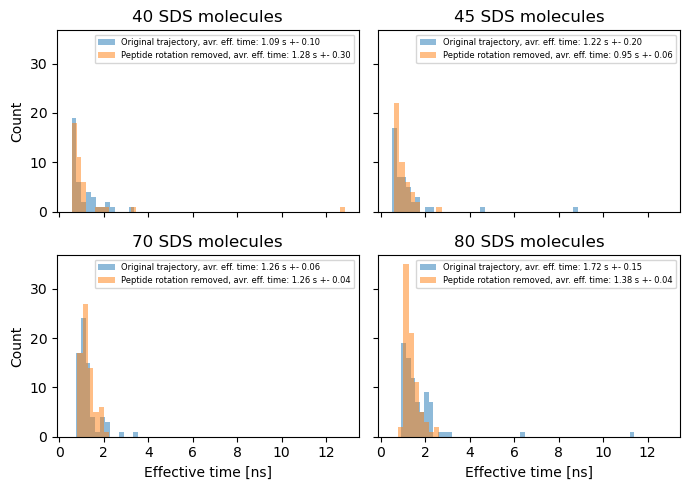

In [7]:
plt.rcParams['figure.autolayout']=True
plt.rcParams.update({'font.size':10})
fig, axs = plt.subplots(2,2, sharex=True,sharey=True,figsize=(7,5))
i=0
labels=['40','45','70','80']
for file, eff in effTimes.items():
    bins1=np.linspace(min(eff),max(eff),int((max(eff)-min(eff))/0.2))
    axs[i//2,i%2].hist(eff,bins=bins1,alpha=0.5,label=f'Original trajectory, avr. eff. time: {np.mean(eff):.2f} s +- {np.std(eff)/np.sqrt(int(labels[i])):.2f}')
    
    #axs[i//2,i%2].text(4,9, f'Average effective time: {np.mean(eff):.2f} s',size=8)
    axs[i//2,i%2].set_title(f'{labels[i]} SDS molecules')
    i+=1
i=0
for file, eff in effTimes2.items():
    bins1=np.linspace(min(eff),max(eff),int((max(eff)-min(eff))/0.2))
    axs[i//2,i%2].hist(eff,bins=bins1,alpha=0.5,label=f'Peptide rotation removed, avr. eff. time: {np.mean(eff):.2f} s +- {np.std(eff)/np.sqrt(int(labels[i])):.2f}')
    #axs[i//2,i%2].text(4,5, f'Average effective time: {np.mean(eff):.2f} s',size=8)
    axs[i//2,i%2].legend(prop={'size':6.0})
    i+=1
axs[0,0].set_ylabel('Count')
axs[1,0].set_ylabel('Count')
axs[1,0].set_xlabel('Effective time [ns]')
axs[1,1].set_xlabel('Effective time [ns]')
#plt.suptitle('GWALP monomer - dynamics of SDS molecules')
plt.savefig('GWALP_different_sizes2.pdf')

In [14]:
for file, eff in effTimes.items():
    bins1=np.linspace(min(eff),max(eff),int((max(eff)-min(eff))/0.2))
    his=(np.histogram(eff,bins=bins1))
    if '_nothing_remove' in file:
        name=f'exported_simulation_data/effective_times{file[:-14]}original_trajectory.dat'
    else:
        name=f'exported_simulation_data/effective_times{file}_peptide_rotation_removed.dat'
    
    np.savetxt(name,np.transpose([bins1[:-1],his[0]]),header=f"Data for {file} \n Effective time, Count")
    
for file, eff in effTimes2.items():
    bins1=np.linspace(min(eff),max(eff),int((max(eff)-min(eff))/0.2))
    
    bins1=np.linspace(min(eff),max(eff),int((max(eff)-min(eff))/0.2))
    his=(np.histogram(eff,bins=bins1))
    if '_nothing_remove' in file:
        name=f'exported_simulation_data/effective_times{file[:-14]}original_trajectory.dat'
    else:
        name=f'exported_simulation_data/effective_times{file}_peptide_rotation_removed.dat'
    
    np.savetxt(name,np.transpose([bins1[:-1],his[0]]),header=f"Data for {file} \n Effective time, Count")
    